In [10]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
from cxr_analysis import load_results_from_log, get_cxr14_rocs_from_log

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Loading reproduce-chexnet data from file
reproduce_chexnet_results_path = '../analysis_data/reproduce_chexnet_aucs.csv'
reproduce_chexnet_results = pd.read_csv(reproduce_chexnet_results_path, 
                                        index_col='LABEL', names=['LABEL','CHEXNET-ORIG', 'CHEXNET-REPRODUCE'],
                                        header=1)
reproduce_chexnet_results.index = reproduce_chexnet_results.index.str.upper()

In [12]:
# Specify log directory to pull results from
log_base_dir = '/dfs/scratch0/jdunnmon/mmtl/results/cxr/logs_for_plotting'
logs_to_load = {
                'MTL-224':'baseline_chexnet_equivalent_results',
                'MTL-224-NO-DRAIN-BASE': 'new_drain_data_without_slice',
                'MTL-224-NO-DRAIN-HPS': 'new_drain_data_with_slice'
                #'MTL-224-DRAIN':'baseline_chexnet_equivalent_results_with_drain',
                #'MTL-512':'baseline_chexnet_equivalent_results_512', # GET WHEN FINISHED
                #'MTL-512-DRAIN':'baseline_chexnet_equivalent_results_with_drain_512',
                }

df_results_dict = {}
df_results_dict['roc-auc'] = reproduce_chexnet_results.copy()
df_results_dict['f1'] = reproduce_chexnet_results.copy()

for name, log in logs_to_load.items():
    # Loading all json logs
    results = load_results_from_log(os.path.join(log_base_dir,log))
    df_results_dict['roc-auc'] = get_cxr14_rocs_from_log(df_results_dict['roc-auc'], results['metrics'], col_name=name, plot_metric='roc-auc')
    df_results_dict['f1'] = get_cxr14_rocs_from_log(df_results_dict['f1'], results['metrics'], col_name=name, plot_metric='f1')
    

In [14]:
df_results_dict['f1'].round(3)

,CHEXNET-ORIG,CHEXNET-REPRODUCE,MTL-224,MTL-224-NO-DRAIN-BASE,MTL-224-NO-DRAIN-HPS
LABEL,,,,,
CARDIOMEGALY,0.910,0.925,0.372,0.376,0.374
CONSOLIDATION,0.801,0.790,0.014,0.002,0.018
EDEMA,0.898,0.888,0.103,0.061,0.117
EFFUSION,0.884,0.864,0.509,0.509,0.490
EMPHYSEMA,0.923,0.937,0.272,0.369,0.395
FIBROSIS,0.829,0.805,0.005,0.011,0.006
HERNIA,0.901,0.916,0.189,0.250,0.000
INFILTRATION,0.708,0.734,0.150,0.202,0.233
MASS,0.831,0.868,0.261,0.329,0.298


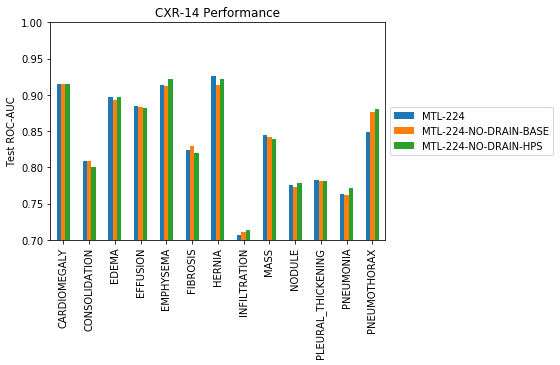

In [23]:
import matplotlib.pyplot as plt
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
#ax = df_compare.plot.bar(rot=45)
save_res = True
#models_to_plot = ['CHEXNET-ORIG','MTL-224','MTL-512']
models_to_plot = ['MTL-224','MTL-224-NO-DRAIN-BASE','MTL-224-NO-DRAIN-HPS']
plot_metric = 'roc-auc'
df_plot = df_results_dict[plot_metric][models_to_plot]
f = plt.figure('ROC-AUC')
plt.title('CXR-14 Performance', color='black')
plt.ylabel(f'Test {plot_metric.upper()}')
plot = df_plot.plot(kind='bar', ax=f.gca(),rot=90)
plot.set_xlabel('')
if plot_metric == 'roc-auc':
    plot.set_ylim([0.7, 1.0])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
if save_res:
    plt.savefig(f'../figures/CXR14-performance-{plot_metric}-mtl-chexnet-224-drain.png',format='png', bbox_inches='tight')
plt.show()

In [34]:
# Plotting drain slice performance
# (1) trained w/o slice: main head on main task
# (2) trained w/slice: main head on slice task, slice head on slice task

slice_results_dict = df_results_dict['f1']['MTL-224'].copy()

df_slice = {}

drain_logs = {}
drain_logs['no_slice'] = 'new_drain_data_without_slice' 
drain_logs['with_slice'] = 'new_drain_data_with_slice'
for ky, log in drain_logs.items():
    results = load_results_from_log(os.path.join(log_base_dir,log))
    slice_results_dict = 
    #slice_metrics = results['slice_metrics']['test']
    #for head in slice_metrics:
    #    df_slice[f'{ky}:{head}'] = get_cxr14_rocs_from_log(slice_results_dict, 
    #                                    slice_metrics[head], col_name=name, plot_metric='f1')

IndentationError: unexpected indent (<ipython-input-34-734acc69d68f>, line 17)

In [31]:
slice_metrics[head]

{'CXR8-DRAIN_PNEUMOTHORAX:chest_drain_cnn_neg/CXR8-DRAIN_test/CXR8-DRAIN_PNEUMOTHORAX:chest_drain_cnn_neg/f1': 0.1511111111111111,
 'CXR8-DRAIN_PNEUMOTHORAX:chest_drain_cnn_neg/CXR8-DRAIN_test/CXR8-DRAIN_PNEUMOTHORAX:chest_drain_cnn_neg/roc-auc': 0}

In [33]:
slice_results_dict

,CHEXNET-ORIG,CHEXNET-REPRODUCE,MTL-224,MTL-224-DRAIN,MTL-512,MTL-512-DRAIN
LABEL,,,,,,
CARDIOMEGALY,0.9105,0.9248,0.915186,0.909604,0.906565,NaN
CONSOLIDATION,0.8008,0.7901,0.808523,0.807961,0.803912,NaN
EDEMA,0.8979,0.8878,0.896757,0.897172,0.894920,NaN
EFFUSION,0.8839,0.8638,0.884382,0.879884,0.885026,NaN
EMPHYSEMA,0.9227,0.9371,0.913678,0.917195,0.928132,NaN
FIBROSIS,0.8293,0.8047,0.823599,0.799483,0.830032,NaN
HERNIA,0.9010,0.9164,0.925394,0.916914,0.941136,NaN
INFILTRATION,0.7077,0.7345,0.706031,0.714152,0.717210,NaN
MASS,0.8308,0.8676,0.844854,0.841627,0.850472,NaN
